The main goal of this problem is to predict the car price (Y) using independent features are exponential features

Following steps to be follwed to solve the problem

01) Data Understanding/Collection and exploration

02) Data Cleaning

03) Data preparation

04) Model Building and Evaluation


# Step1: Data Understanding and Exploration

look at the data set and understand the data attributes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
# Reading the data

car_price=pd.read_csv("CarPrice_Assignment.csv")

In [3]:
# Summary of the car data set 205 rows, 26 columns and no null values

print(car_price.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
# segrigating numerical data types

In [20]:
car_price_numerical=car_price.select_dtypes(include=['float64','int64'])

In [21]:
car_price_numerical.head(4)

car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0       1          3       88.6      168.8      64.1       48.8        2548   
1       2          3       88.6      168.8      64.1       48.8        2548   
2       3          1       94.5      171.2      65.5       52.4        2823   
3       4          2       99.8      176.6      66.2       54.3        2337   

   enginesize  boreratio  stroke  compressionratio  horsepower  peakrpm  \
0         130       3.47    2.68               9.0         111     5000   
1         130       3.47    2.68               9.0         111     5000   
2         152       2.68    3.47               9.0         154     5000   
3         109       3.19    3.40              10.0         102     5500   

   citympg  highwaympg    price  
0       21          27  13495.0  
1       21          27  16500.0  
2       19          26  16500.0  
3       24          30  13950.0

In [22]:
# dropping Car_Id

car_price_numerical=car_price_numerical.drop(['car_ID'],axis=1)
car_price_numerical.head(4)

symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0          3       88.6      168.8      64.1       48.8        2548   
1          3       88.6      168.8      64.1       48.8        2548   
2          1       94.5      171.2      65.5       52.4        2823   
3          2       99.8      176.6      66.2       54.3        2337   

   enginesize  boreratio  stroke  compressionratio  horsepower  peakrpm  \
0         130       3.47    2.68               9.0         111     5000   
1         130       3.47    2.68               9.0         111     5000   
2         152       2.68    3.47               9.0         154     5000   
3         109       3.19    3.40              10.0         102     5500   

   citympg  highwaympg    price  
0       21          27  13495.0  
1       21          27  16500.0  
2       19          26  16500.0  
3       24          30  13950.0

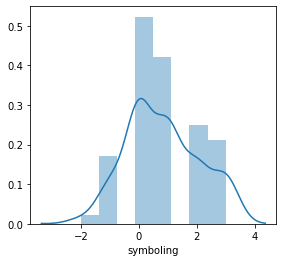

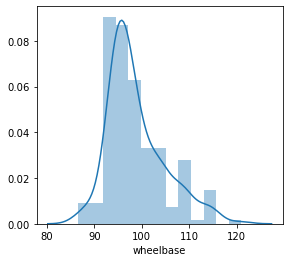

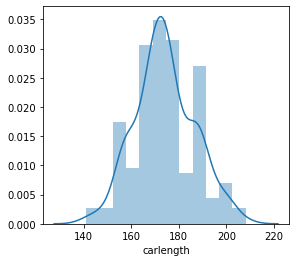

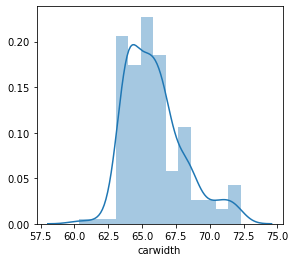

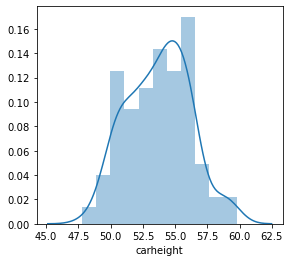

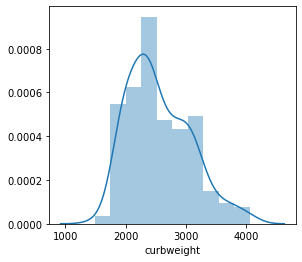

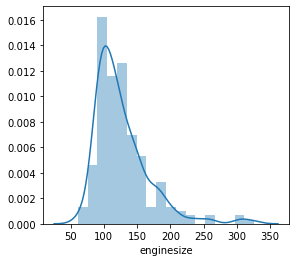

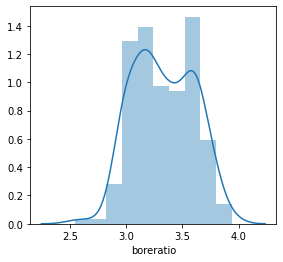

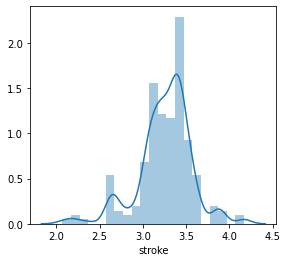

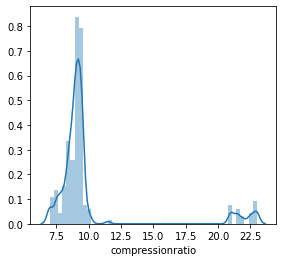

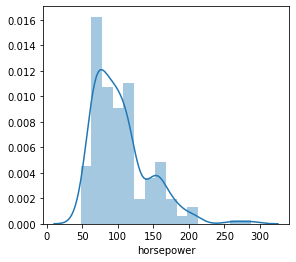

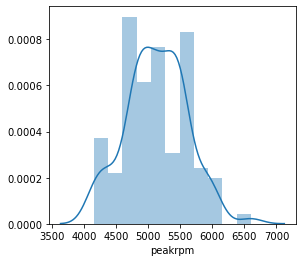

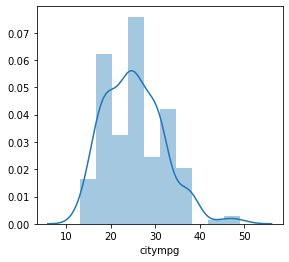

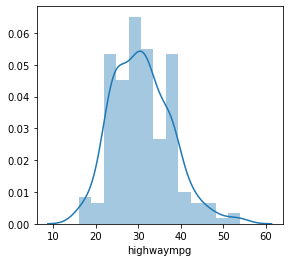

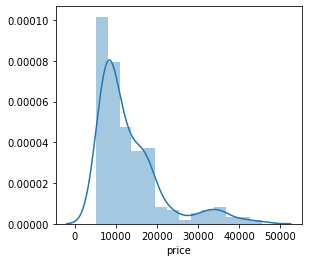

In [24]:
## Checking the data distribution of all numerical data types

for i in car_price_numerical.columns:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.distplot(car_price_numerical[i])
    plt.show()

In [27]:
car_price_categorical=car_price.select_dtypes(include=['object'])
car_price_categorical.head(4)

CarName fueltype aspiration doornumber      carbody  \
0        alfa-romero giulia      gas        std        two  convertible   
1       alfa-romero stelvio      gas        std        two  convertible   
2  alfa-romero Quadrifoglio      gas        std        two    hatchback   
3               audi 100 ls      gas        std       four        sedan   

  drivewheel enginelocation enginetype cylindernumber fuelsystem  
0        rwd          front       dohc           four       mpfi  
1        rwd          front       dohc           four       mpfi  
2        rwd          front       ohcv            six       mpfi  
3        fwd          front        ohc           four       mpfi

#Data Exploration

To perform linear regression, the (numeric) target variable should be linearly related to at least one another numeric variable. Let's see whether that's true in this case.

We'll first subset the list of all (independent) numeric variables, and then make a pairwise plot


<Figure size 1440x720 with 0 Axes>

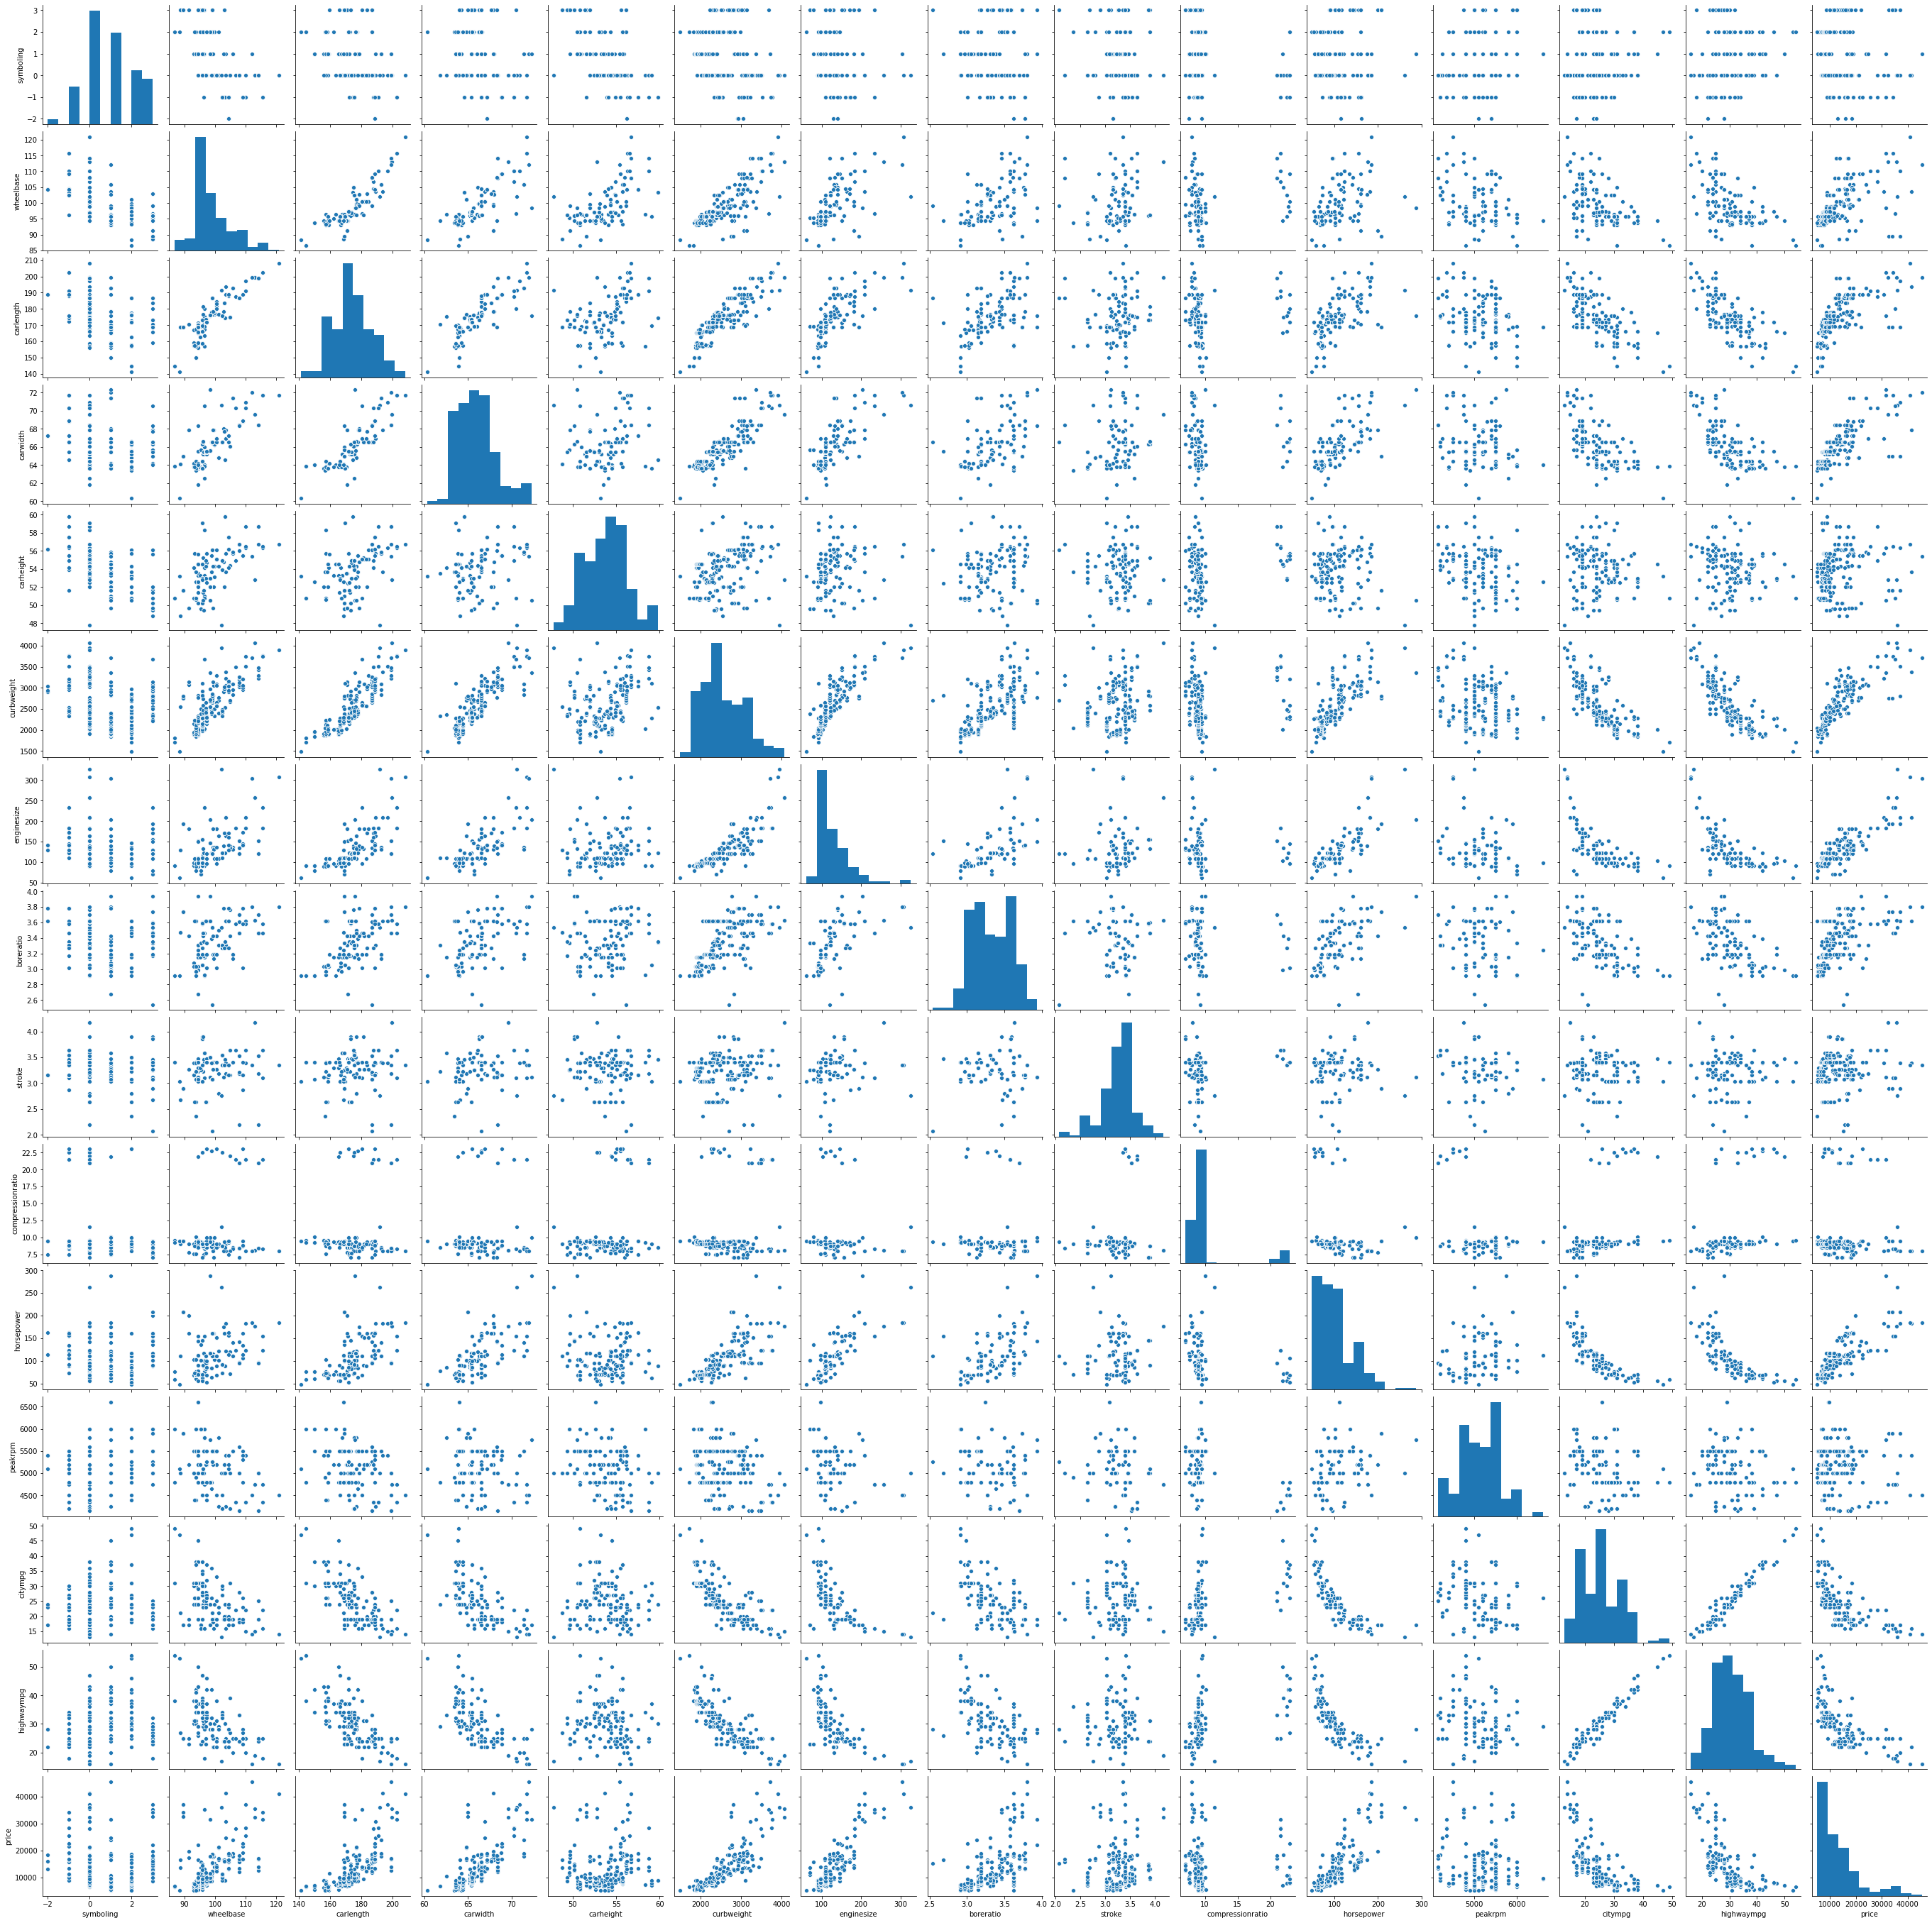

In [30]:
plt.figure(figsize=(20,10))
sns.pairplot(car_price_numerical)
plt.show()

This is quite hard to read, and we can rather plot correlations between variables. Also, a heatmap is pretty useful to visualise multiple correlations in one plot.

In [35]:
car_cor=car_price_numerical.corr()
car_cor

symboling  wheelbase  carlength  carwidth  carheight  \
symboling          1.000000  -0.531954  -0.357612 -0.232919  -0.541038   
wheelbase         -0.531954   1.000000   0.874587  0.795144   0.589435   
carlength         -0.357612   0.874587   1.000000  0.841118   0.491029   
carwidth          -0.232919   0.795144   0.841118  1.000000   0.279210   
carheight         -0.541038   0.589435   0.491029  0.279210   1.000000   
curbweight        -0.227691   0.776386   0.877728  0.867032   0.295572   
enginesize        -0.105790   0.569329   0.683360  0.735433   0.067149   
boreratio         -0.130051   0.488750   0.606454  0.559150   0.171071   
stroke            -0.008735   0.160959   0.129533  0.182942  -0.055307   
compressionratio  -0.178515   0.249786   0.158414  0.181129   0.261214   
horsepower         0.070873   0.353294   0.552623  0.640732  -0.108802   
peakrpm            0.273606  -0.360469  -0.287242 -0.220012  -0.320411   
citympg           -0.035823  -0.470414  -0.670909 -0.642704  -0.048640   
highwaympg         0.034606  -0.544082  -0.704662 -0.677218  -0.107358   
price             -0.079978   0.577816   0.682920  0.759325   0.119336   

                  curbweight  enginesize  boreratio    stroke  \
symboling          -0.227691   -0.105790  -0.130051 -0.008735   
wheelbase           0.776386    0.569329   0.488750  0.160959   
carlength           0.877728    0.683360   0.606454  0.129533   
carwidth            0.867032    0.735433   0.559150  0.182942   
carheight           0.295572    0.067149   0.171071 -0.055307   
curbweight          1.000000    0.850594   0.648480  0.168790   
enginesize          0.850594    1.000000   0.583774  0.203129   
boreratio           0.648480    0.583774   1.000000 -0.055909   
stroke              0.168790    0.203129  -0.055909  1.000000   
compressionratio    0.151362    0.028971   0.005197  0.186110   
horsepower          0.750739    0.809769   0.573677  0.080940   
peakrpm            -0.266243   -0.244660  -0.254976 -0.067964   
citympg            -0.757414   -0.653658  -0.584532 -0.042145   
highwaympg         -0.797465   -0.677470  -0.587012 -0.043931   
price               0.835305    0.874145   0.553173  0.079443   

                  compressionratio  horsepower   peakrpm   citympg  \
symboling                -0.178515    0.070873  0.273606 -0.035823   
wheelbase                 0.249786    0.353294 -0.360469 -0.470414   
carlength                 0.158414    0.552623 -0.287242 -0.670909   
carwidth                  0.181129    0.640732 -0.220012 -0.642704   
carheight                 0.261214   -0.108802 -0.320411 -0.048640   
curbweight                0.151362    0.750739 -0.266243 -0.757414   
enginesize                0.028971    0.809769 -0.244660 -0.653658   
boreratio                 0.005197    0.573677 -0.254976 -0.584532   
stroke                    0.186110    0.080940 -0.067964 -0.042145   
compressionratio          1.000000   -0.204326 -0.435741  0.324701   
horsepower               -0.204326    1.000000  0.131073 -0.801456   
peakrpm                  -0.435741    0.131073  1.000000 -0.113544   
citympg                   0.324701   -0.801456 -0.113544  1.000000   
highwaympg                0.265201   -0.770544 -0.054275  0.971337   
price                     0.067984    0.808139 -0.085267 -0.685751   

                  highwaympg     price  
symboling           0.034606 -0.079978  
wheelbase          -0.544082  0.577816  
carlength          -0.704662  0.682920  
carwidth           -0.677218  0.759325  
carheight          -0.107358  0.119336  
curbweight         -0.797465  0.835305  
enginesize         -0.677470  0.874145  
boreratio          -0.587012  0.553173  
stroke             -0.043931  0.079443  
compressionratio    0.265201  0.067984  
horsepower         -0.770544  0.808139  
peakrpm            -0.054275 -0.085267  
citympg             0.971337 -0.685751  
highwaympg          1.000000 -0.697599  
price              -0.697599  1.000000

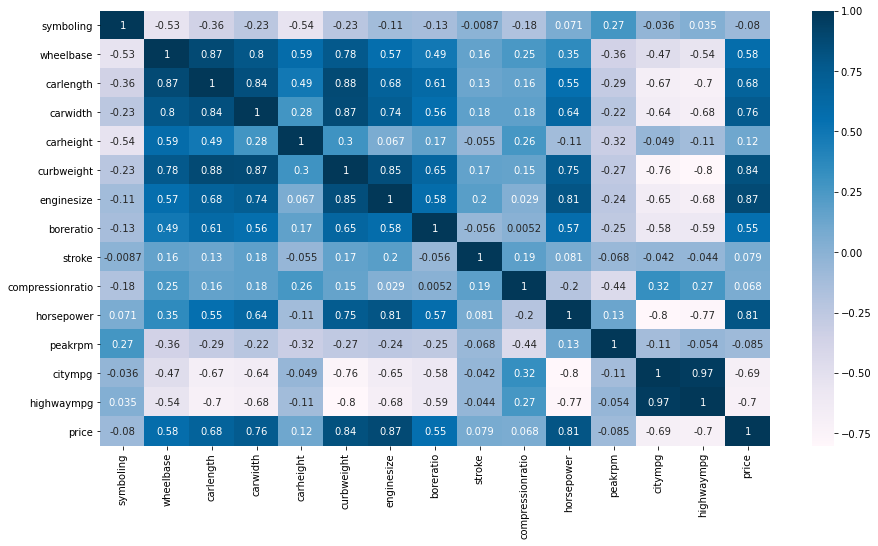

In [40]:
# plotting correlation on heatmap

plt.figure(figsize=(15,8))

# heat map
sns.heatmap(car_cor,cmap='PuBu',annot=True) ## annot= true will write the data in each cell # cmap is the color map
plt.show()

#the heatmap shows some useful insights:
    
01) The price is positively correlated with the below independent features
#Symobling

#wheelbase

#carlength

#carwidth

#carheight

#Curbweight

#enginesize

#boreratio

#stroke

#compressionratio

#horsepower

02) Price is negatively correlated to citympg and highwaympg (-0.70 approximately). This suggest that cars having high mileage may fall in the 'economy' cars category, and are priced lower (think Maruti Alto/Swift type of cars, which are designed to be affordable by the middle class, who value mileage more than horsepower/size of car etc.)

Correlation among independent variables:

Many independent variables are highly correlated (look at the top-left part of matrix): wheelbase, carlength, curbweight, enginesize etc. are all measures of 'size/weight', and are positively correlated
Thus, while building the model, we'll have to pay attention to multicollinearity (especially linear models, such as linear and logistic regression, suffer more from multicollinearity).

# Step2: Data Cleaning

Let's now conduct some data cleaning steps.

We've seen that there are no missing values in the dataset. We've also seen that variables are in the correct format 


In [42]:
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [43]:
# Check few car names
car_price["CarName"]

0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
                 ...           
200             volvo 145e (sw)
201                 volvo 144ea
202                 volvo 244dl
203                   volvo 246
204                 volvo 264gl
Name: CarName, Length: 205, dtype: object

In [51]:
# Method 2: Use regular expressions
import re

# regex: any alphanumeric sequence before a space, may contain a hyphen
p = re.compile(r'\w+-?\w+')
carnames = car_price['CarName'].apply(lambda x: re.findall(p, x)[0])
print(carnames)

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: CarName, Length: 205, dtype: object


In [62]:
car_price.drop(["car_companay"],axis=1,inplace=True)

In [63]:
car_price

car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible        rwd          front       88.6  ...   
1          two  convertible        rwd          front       88.6  ...   
2          two    hatchback        rwd          front       94.5  ...   
3         four        sedan        fwd          front       99.8  ...   
4         four        sedan        4wd          front       99.4  ...   
..         ...          ...        ...            ...        ...  ...   
200       four        sedan        rwd          front      109.1  ...   
201       four        sedan        rwd          front      109.1  ...   
202       four        sedan        rwd          front      109.1  ...   
203       four        sedan        rwd          front      109.1  ...   
204       four        sedan        rwd          front      109.1  ...   

     enginesize  fuelsystem  boreratio  stroke compressionratio horsepower  \
0           130        mpfi       3.47    2.68              9.0        111   
1           130        mpfi       3.47    2.68              9.0        111   
2           152        mpfi       2.68    3.47              9.0        154   
3           109        mpfi       3.19    3.40             10.0        102   
4           136        mpfi       3.19    3.40              8.0        115   
..          ...         ...        ...     ...              ...        ...   
200         141        mpfi       3.78    3.15              9.5        114   
201         141        mpfi       3.78    3.15              8.7        160   
202         173        mpfi       3.58    2.87              8.8        134   
203         145         idi       3.01    3.40             23.0        106   
204         141        mpfi       3.78    3.15              9.5        114   

     peakrpm citympg  highwaympg    price  
0       5000      21          27  13495.0  
1       5000      21          27  16500.0  
2       5000      19          26  16500.0  
3       5500      24          30  13950.0  
4       5500      18          22  17450.0  
..       ...     ...         ...      ...  
200     5400      23          28  16845.0  
201     5300      19          25  19045.0  
202     5500      18          23  21485.0  
203     4800      26          27  22470.0  
204     5400      19          25  22625.0  

[205 rows x 26 columns]

In [64]:
car_price["car_company"]=carnames

In [65]:
# to count the values or data setup
car_price["car_company"].value_counts()

toyota         31
nissan         17
mazda          15
mitsubishi     13
honda          13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
chevrolet       3
jaguar          3
alfa-romero     3
vw              2
renault         2
maxda           2
mercury         1
vokswagen       1
porcshce        1
Nissan          1
toyouta         1
Name: car_company, dtype: int64

In [66]:
#drop the carname column from the data 

car_price.drop(["CarName"],axis=1)

car_ID  symboling fueltype aspiration doornumber      carbody drivewheel  \
0         1          3      gas        std        two  convertible        rwd   
1         2          3      gas        std        two  convertible        rwd   
2         3          1      gas        std        two    hatchback        rwd   
3         4          2      gas        std       four        sedan        fwd   
4         5          2      gas        std       four        sedan        4wd   
..      ...        ...      ...        ...        ...          ...        ...   
200     201         -1      gas        std       four        sedan        rwd   
201     202         -1      gas      turbo       four        sedan        rwd   
202     203         -1      gas        std       four        sedan        rwd   
203     204         -1   diesel      turbo       four        sedan        rwd   
204     205         -1      gas      turbo       four        sedan        rwd   

    enginelocation  wheelbase  carlength  ...  fuelsystem  boreratio  stroke  \
0            front       88.6      168.8  ...        mpfi       3.47    2.68   
1            front       88.6      168.8  ...        mpfi       3.47    2.68   
2            front       94.5      171.2  ...        mpfi       2.68    3.47   
3            front       99.8      176.6  ...        mpfi       3.19    3.40   
4            front       99.4      176.6  ...        mpfi       3.19    3.40   
..             ...        ...        ...  ...         ...        ...     ...   
200          front      109.1      188.8  ...        mpfi       3.78    3.15   
201          front      109.1      188.8  ...        mpfi       3.78    3.15   
202          front      109.1      188.8  ...        mpfi       3.58    2.87   
203          front      109.1      188.8  ...         idi       3.01    3.40   
204          front      109.1      188.8  ...        mpfi       3.78    3.15   

    compressionratio horsepower  peakrpm citympg  highwaympg    price  \
0                9.0        111     5000      21          27  13495.0   
1                9.0        111     5000      21          27  16500.0   
2                9.0        154     5000      19          26  16500.0   
3               10.0        102     5500      24          30  13950.0   
4                8.0        115     5500      18          22  17450.0   
..               ...        ...      ...     ...         ...      ...   
200              9.5        114     5400      23          28  16845.0   
201              8.7        160     5300      19          25  19045.0   
202              8.8        134     5500      18          23  21485.0   
203             23.0        106     4800      26          27  22470.0   
204              9.5        114     5400      19          25  22625.0   

     car_company  
0    alfa-romero  
1    alfa-romero  
2    alfa-romero  
3           audi  
4           audi  
..           ...  
200        volvo  
201        volvo  
202        volvo  
203        volvo  
204        volvo  

[205 rows x 26 columns]

#Notice that some car-company names are misspelled - vw and vokswagen should be volkswagen, porcshce should be porsche, toyouta should be toyota, Nissan should be nissan, maxda should be mazda etc.

This is a data quality issue, let's solve it.

In [81]:
#volkswagen

car_price.loc[(car_price["car_company"]=="vw")|
              (["car_company"]=="vokswagen")
              ,"car_company"]=="volkswagen"
#toyoto

car_price.loc[car_price["car_company"]=="toyouta",'car_company']="toyota"

#mazda

car_price.loc[car_price["car_company"]=="maxda","car_company"]="mazda"

#porcshce

car_price.loc[car_price["car_company"]=="porcshce","car_company"]="porsche"

#nissan

car_price.loc[car_price["car_company"]=="Nissan","car_company"]="nissan"

In [83]:
car_price["car_company"].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
alfa-romero     3
chevrolet       3
jaguar          3
renault         2
vw              2
mercury         1
vokswagen       1
Name: car_company, dtype: int64

In [87]:
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [86]:
#dropping the CarName

car_price.drop(["CarName"],axis=1)

car_ID  symboling fueltype aspiration doornumber      carbody drivewheel  \
0         1          3      gas        std        two  convertible        rwd   
1         2          3      gas        std        two  convertible        rwd   
2         3          1      gas        std        two    hatchback        rwd   
3         4          2      gas        std       four        sedan        fwd   
4         5          2      gas        std       four        sedan        4wd   
..      ...        ...      ...        ...        ...          ...        ...   
200     201         -1      gas        std       four        sedan        rwd   
201     202         -1      gas      turbo       four        sedan        rwd   
202     203         -1      gas        std       four        sedan        rwd   
203     204         -1   diesel      turbo       four        sedan        rwd   
204     205         -1      gas      turbo       four        sedan        rwd   

    enginelocation  wheelbase  carlength  ...  fuelsystem  boreratio  stroke  \
0            front       88.6      168.8  ...        mpfi       3.47    2.68   
1            front       88.6      168.8  ...        mpfi       3.47    2.68   
2            front       94.5      171.2  ...        mpfi       2.68    3.47   
3            front       99.8      176.6  ...        mpfi       3.19    3.40   
4            front       99.4      176.6  ...        mpfi       3.19    3.40   
..             ...        ...        ...  ...         ...        ...     ...   
200          front      109.1      188.8  ...        mpfi       3.78    3.15   
201          front      109.1      188.8  ...        mpfi       3.78    3.15   
202          front      109.1      188.8  ...        mpfi       3.58    2.87   
203          front      109.1      188.8  ...         idi       3.01    3.40   
204          front      109.1      188.8  ...        mpfi       3.78    3.15   

    compressionratio horsepower  peakrpm citympg  highwaympg    price  \
0                9.0        111     5000      21          27  13495.0   
1                9.0        111     5000      21          27  16500.0   
2                9.0        154     5000      19          26  16500.0   
3               10.0        102     5500      24          30  13950.0   
4                8.0        115     5500      18          22  17450.0   
..               ...        ...      ...     ...         ...      ...   
200              9.5        114     5400      23          28  16845.0   
201              8.7        160     5300      19          25  19045.0   
202              8.8        134     5500      18          23  21485.0   
203             23.0        106     4800      26          27  22470.0   
204              9.5        114     5400      19          25  22625.0   

     car_company  
0    alfa-romero  
1    alfa-romero  
2    alfa-romero  
3           audi  
4           audi  
..           ...  
200        volvo  
201        volvo  
202        volvo  
203        volvo  
204        volvo  

[205 rows x 26 columns]